# Rental property analysis in Germany

# Task 3: Geographical Visualizations with Python

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import geojson

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 2. Import Data

In [3]:
# Import ".json" file for Germany 

germany_geo = r'C:\Users\marce\Documents\Apartment rental offers in Germany\02 Data\Original Data\bundeslaender_simplify20.geojson'





In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\marce\Documents\Apartment rental offers in Germany\02 Data\Original Data\bundeslaender_simplify20.geojson',)
  
# returns JSON object asa dictionary
data = geojson.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)
   
    

{"geometry": {"coordinates": [[[[8.449215, 55.049579], [8.457736, 55.047695], [8.461312, 55.047624], [8.463999, 55.046321], [8.464196, 55.045715], [8.463325, 55.045252], [8.460396, 55.044629], [8.453004, 55.043966], [8.451297, 55.04349], [8.449449, 55.042466], [8.448226, 55.042351], [8.444686, 55.042839], [8.443655, 55.043367], [8.442759, 55.044571], [8.438572, 55.046875], [8.434526, 55.048541], [8.432442, 55.048924], [8.428835, 55.048481], [8.423375, 55.047111], [8.421707, 55.046987], [8.418327, 55.047606], [8.417334, 55.047365], [8.416253, 55.047764], [8.415193, 55.047747], [8.413771, 55.047147], [8.407368, 55.046818], [8.399212, 55.046909], [8.396235, 55.046155], [8.395208, 55.044375], [8.395589, 55.043451], [8.396816, 55.04235], [8.397528, 55.03813], [8.399176, 55.035304], [8.40054, 55.034814], [8.405928, 55.034197], [8.409202, 55.034571], [8.413888, 55.034615], [8.418828, 55.035177], [8.42267, 55.034213], [8.426277, 55.032807], [8.426519, 55.033122], [8.426041, 55.033755], [8.4271

In [5]:
# Define path

path = r"C:\Users\marce\Documents\Apartment rental offers in Germany"

In [6]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_cleaned.csv'), index_col=False)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210771 entries, 0 to 210770
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        210771 non-null  int64  
 1   State             210771 non-null  object 
 2   Maintenance_fee   207189 non-null  float64
 3   Heating_type      182377 non-null  object 
 4   TV_offer          184455 non-null  object 
 5   Newly_built       210771 non-null  bool   
 6   Balcony           210771 non-null  bool   
 7   Picture_count     210771 non-null  int64  
 8   Price_trend       209264 non-null  float64
 9   Total_rent        178163 non-null  float64
 10  Year_constructed  210771 non-null  int64  
 11  Kitchen           210771 non-null  bool   
 12  Cellar            210771 non-null  bool   
 13  Base_rent         210771 non-null  float64
 14  Area(m2)          210771 non-null  float64
 15  City              210771 non-null  object 
 16  House_condition   16

In [8]:
df.head()

Unnamed: 0                State  Maintenance_fee  \
0           0  Nordrhein_Westfalen           245.00   
1           1      Rheinland_Pfalz           134.00   
2           2              Sachsen           255.00   
3           3              Sachsen            58.15   
4           4               Bremen           138.00   

                     Heating_type       TV_offer  Newly_built  Balcony  \
0                 central_heating  ONE_YEAR_FREE        False    False   
1  self_contained_central_heating  ONE_YEAR_FREE        False     True   
2                   floor_heating  ONE_YEAR_FREE         True     True   
3                district_heating  ONE_YEAR_FREE        False     True   
4  self_contained_central_heating            NaN        False     True   

   Picture_count  Price_trend  Total_rent  ...  Base_rent  Area(m2)  \
0              6         4.62       840.0  ...      595.0     86.00   
1              8         3.47         NaN  ...      800.0     89.00   
2              8         2.72      1300.0  ...      965.0     83.80   
3              9         1.53         NaN  ...      343.0     58.15   
4             19         2.46       903.0  ...      765.0     84.97   

                  City  House_condition   Lift     Flat_type Pincode  \
0             Dortmund        well_kept  False  ground_floor   44269   
1    Rhein_Pfalz_Kreis      refurbished  False  ground_floor   67459   
2              Dresden   first_time_use   True     apartment    1097   
3  Mittelsachsen_Kreis              NaN  False         other    9599   
4               Bremen      refurbished  False     apartment   28213   

   Rooms_number Floor  Garden  
0             4   1.0    True  
1             3   NaN   False  
2             3   3.0   False  
3             3   3.0   False  
4             3   1.0   False  

[5 rows x 23 columns]

In [9]:
#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df=df[df['Total_rent']<=3000]


# 3. Consistency checks

In [11]:
# Check for missing values

df.isnull().sum() 

State                   0
Maintenance_fee      1701
Heating_type        22748
TV_offer            21914
Newly_built             0
Balcony                 0
Picture_count           0
Price_trend          1290
Total_rent              0
Year_constructed        0
Kitchen                 0
Cellar                  0
Base_rent               0
Area(m2)                0
City                    0
House_condition     40251
Lift                    0
Flat_type           23301
Pincode                 0
Rooms_number            0
Floor               27920
Garden                  0
dtype: int64

In [12]:
#Impute missing values with mean

df['Price_trend']=df['Price_trend'].fillna(df['Price_trend'].mean())
df['Maintenance_fee']=df['Maintenance_fee'].fillna(df['Maintenance_fee'].mean())
df['Total_rent']=df['Total_rent'].fillna(df['Total_rent'].mean())
df['Floor']=df['Floor'].fillna(df['Floor'].mean())


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176621 entries, 0 to 210769
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             176621 non-null  object 
 1   Maintenance_fee   176621 non-null  float64
 2   Heating_type      153873 non-null  object 
 3   TV_offer          154707 non-null  object 
 4   Newly_built       176621 non-null  bool   
 5   Balcony           176621 non-null  bool   
 6   Picture_count     176621 non-null  int64  
 7   Price_trend       176621 non-null  float64
 8   Total_rent        176621 non-null  float64
 9   Year_constructed  176621 non-null  int64  
 10  Kitchen           176621 non-null  bool   
 11  Cellar            176621 non-null  bool   
 12  Base_rent         176621 non-null  float64
 13  Area(m2)          176621 non-null  float64
 14  City              176621 non-null  object 
 15  House_condition   136370 non-null  object 
 16  Lift              17

In [14]:
#Finding the most frequent value
df['TV_offer'].mode()

0    ONE_YEAR_FREE
Name: TV_offer, dtype: object

In [15]:
#Finding the most frequent value
df['Heating_type'].mode()


0    central_heating
Name: Heating_type, dtype: object

In [16]:
#Finding the most frequent value
df['House_condition'].mode()

0    well_kept
Name: House_condition, dtype: object

In [17]:
#Finding the most frequent value
df['Flat_type'].mode()

0    apartment
Name: Flat_type, dtype: object

In [18]:
#Impute categorical missing values with mode()
df['TV_offer'].fillna('ONE_YEAR_FREE',inplace=True)
df['Heating_type'].fillna('central_heating',inplace=True)
df['House_condition'].fillna('well_kept',inplace=True)
df['Flat_type'].fillna('apartment',inplace=True)

In [19]:
df.isnull().sum()

State               0
Maintenance_fee     0
Heating_type        0
TV_offer            0
Newly_built         0
Balcony             0
Picture_count       0
Price_trend         0
Total_rent          0
Year_constructed    0
Kitchen             0
Cellar              0
Base_rent           0
Area(m2)            0
City                0
House_condition     0
Lift                0
Flat_type           0
Pincode             0
Rooms_number        0
Floor               0
Garden              0
dtype: int64

In [20]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(175329, 22)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175329 entries, 0 to 210769
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             175329 non-null  object 
 1   Maintenance_fee   175329 non-null  float64
 2   Heating_type      175329 non-null  object 
 3   TV_offer          175329 non-null  object 
 4   Newly_built       175329 non-null  bool   
 5   Balcony           175329 non-null  bool   
 6   Picture_count     175329 non-null  int64  
 7   Price_trend       175329 non-null  float64
 8   Total_rent        175329 non-null  float64
 9   Year_constructed  175329 non-null  int64  
 10  Kitchen           175329 non-null  bool   
 11  Cellar            175329 non-null  bool   
 12  Base_rent         175329 non-null  float64
 13  Area(m2)          175329 non-null  float64
 14  City              175329 non-null  object 
 15  House_condition   175329 non-null  object 
 16  Lift              17

In [23]:
#Change Data Type
df['Maintenance_fee']=df['Maintenance_fee'].astype(int)
df['Area(m2)']=df['Area(m2)'].astype(int)
df['Base_rent']=df['Base_rent'].astype(int)
df['Floor']=df['Floor'].astype(int)
df['Price_trend']=df['Price_trend'].astype(int)
df['Total_rent']=df['Total_rent'].astype(int)


<Axes: xlabel='Total_rent', ylabel='Count'>

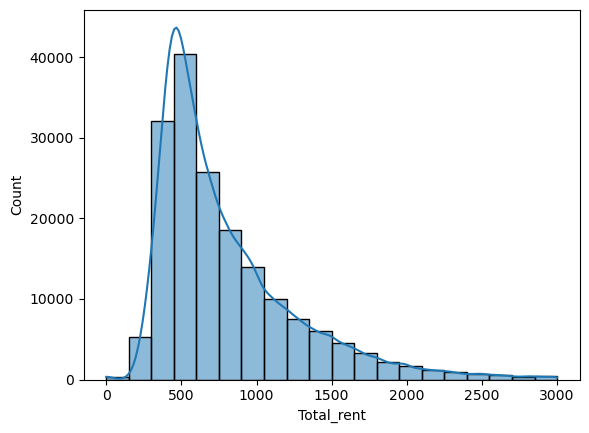

In [24]:
# Extreme values check

sns.histplot(df['Total_rent'], bins=20, kde = True)

<Axes: xlabel='Year_constructed', ylabel='Count'>

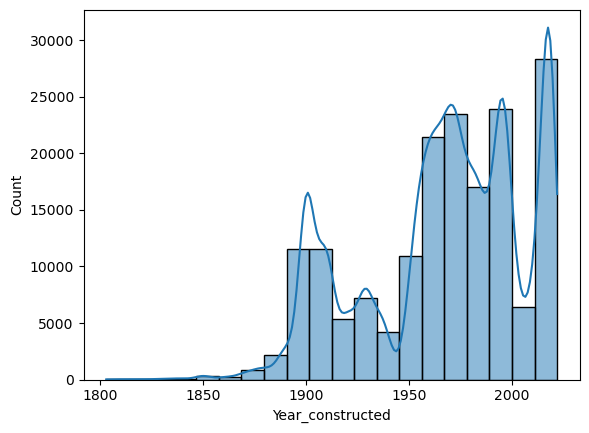

In [25]:
# Extreme values check

sns.histplot(df['Year_constructed'], bins=20, kde = True)

In [26]:
# Check how many extreme values

df[df['Year_constructed'] <1850]

State  Maintenance_fee  \
2857             Niedersachsen               80   
3771                    Bayern              150   
5474           Rheinland_Pfalz              180   
5821            Sachsen_Anhalt              393   
8213               Brandenburg               90   
...                        ...              ...   
203747                  Bayern              155   
204047  Mecklenburg_Vorpommern              170   
204063             Brandenburg              182   
206030          Sachsen_Anhalt              110   
210505                  Bayern              180   

                          Heating_type       TV_offer  Newly_built  Balcony  \
2857                   central_heating  ONE_YEAR_FREE        False    False   
3771                     floor_heating  ONE_YEAR_FREE        False    False   
5474    self_contained_central_heating  ONE_YEAR_FREE        False     True   
5821                   central_heating  ONE_YEAR_FREE        False     True   
8213                   central_heating  ONE_YEAR_FREE        False    False   
...                                ...            ...          ...      ...   
203747                       heat_pump      ON_DEMAND        False     True   
204047                district_heating  ONE_YEAR_FREE        False    False   
204063  self_contained_central_heating  ONE_YEAR_FREE        False     True   
206030  self_contained_central_heating  ONE_YEAR_FREE        False     True   
210505                 central_heating  ONE_YEAR_FREE        False     True   

        Picture_count  Price_trend  Total_rent  Year_constructed  ...  \
2857                8            3         335              1849  ...   
3771               11            0         982              1818  ...   
5474                2            5        1230              1830  ...   
5821               11            1        1307              1828  ...   
8213                5            3         801              1820  ...   
...               ...          ...         ...               ...  ...   
203747             16            2         610              1820  ...   
204047             16            4         719              1828  ...   
204063             11            6        1508              1840  ...   
206030              2            0         630              1828  ...   
210505             20            3        1060              1844  ...   

        Base_rent  Area(m2)                        City  House_condition  \
2857          250        21           Wesermarsch_Kreis        well_kept   
3771          832        64                  Ingolstadt        well_kept   
5474         1050        86         Bad_Kreuznach_Kreis  fully_renovated   
5821          914       131                   Magdeburg        well_kept   
8213          621        84           Elbe_Elster_Kreis        well_kept   
...           ...       ...                         ...              ...   
203747        455        61  Berchtesgadener_Land_Kreis  fully_renovated   
204047        549        78                    Schwerin        well_kept   
204063       1291       142                     Potsdam        well_kept   
206030        520        86                  Harz_Kreis       modernized   
210505        880        74            Traunstein_Kreis        well_kept   

         Lift    Flat_type  Pincode Rooms_number  Floor  Garden  
2857    False    apartment    26931            1      2   False  
3771    False    apartment    85049            2      2   False  
5474    False    apartment    55543            3      2   False  
5821     True        other    39104            4      2   False  
8213     True    apartment     4924            2      1   False  
...       ...          ...      ...          ...    ...     ...  
203747   True    apartment    83410            2      2    True  
204047   True  roof_storey    19053            2      2    True  
204063  False    apartment    14467            4      1   False  
206030  False

In [27]:
df.head()

State  Maintenance_fee                    Heating_type  \
0  Nordrhein_Westfalen              245                 central_heating   
2              Sachsen              255                   floor_heating   
4               Bremen              138  self_contained_central_heating   
6               Bremen               88                 central_heating   
7    Baden_Württemberg              110                     oil_heating   

        TV_offer  Newly_built  Balcony  Picture_count  Price_trend  \
0  ONE_YEAR_FREE        False    False              6            4   
2  ONE_YEAR_FREE         True     True              8            2   
4  ONE_YEAR_FREE        False     True             19            2   
6  ONE_YEAR_FREE        False     True              5            1   
7  ONE_YEAR_FREE        False    False              5            3   

   Total_rent  Year_constructed  ...  Base_rent  Area(m2)               City  \
0         840              1965  ...        595        86           Dortmund   
2        1300              2019  ...        965        83            Dresden   
4         903              1950  ...        765        84             Bremen   
6         584              1959  ...        452        60             Bremen   
7         690              1970  ...        580        53  Emmendingen_Kreis   

   House_condition   Lift     Flat_type  Pincode Rooms_number  Floor  Garden  
0        well_kept  False  ground_floor    44269            4      1    True  
2   first_time_use   True     apartment     1097            3      3   False  
4      refurbished  False     apartment    28213            3      1   False  
6        well_kept  False  ground_floor    28717            3      2   False  
7        well_kept  False   roof_storey    79211            2      2   False  

[5 rows x 22 columns]

In [32]:
# Rename states name that allow us to make a correct choropleth plotting 
df.replace(to_replace='Nordrhein_Westfalen',value='Nordrhein-Westfalen',inplace = True)
df.replace(to_replace='Rheinland_Pfalz',value='Rheinland-Pfalz',inplace = True)
df.replace(to_replace='Baden_Württemberg',value='Baden-Wurttemberg',inplace = True)
df.replace(to_replace='Sachsen_Anhalt',value='Sachsen-Anhalt',inplace = True)
df.replace(to_replace='Schleswig_Holstein',value='Schleswig-Holstein',inplace = True)    
df.replace(to_replace='Mecklenburg_Vorpommern',value='Mecklenburg-Vorpommern',inplace = True)


In [44]:

df.replace(to_replace='Baden-Wuerttemberg',value='Baden-Württemberg',inplace = True)

In [45]:
df['State'].value_counts()



Nordrhein-Westfalen       40177
Sachsen                   38536
Bayern                    14158
Sachsen-Anhalt            13782
Hessen                    10877
Baden-Württemberg          9621
Niedersachsen              9500
Berlin                     7874
Thüringen                  5799
Brandenburg                5362
Schleswig-Holstein         4856
Mecklenburg-Vorpommern     4805
Rheinland-Pfalz            4675
Hamburg                    2781
Bremen                     1802
Saarland                    724
Name: State, dtype: int64

# 4. Plotting a choropleth

In [53]:
# Create a data frame with just the cities and the rental values we want plotted


data_to_plot = df.groupby('State')['Total_rent'].mean()

data_to_plot


State
Baden-Württemberg         1132.278661
Bayern                    1142.069431
Berlin                    1229.879985
Brandenburg                664.365908
Bremen                     792.038846
Hamburg                   1329.281913
Hessen                    1143.537832
Mecklenburg-Vorpommern     563.898439
Niedersachsen              781.635263
Nordrhein-Westfalen        775.011748
Rheinland-Pfalz            881.506524
Saarland                   727.846685
Sachsen                    574.480719
Sachsen-Anhalt             504.284139
Schleswig-Holstein         828.152183
Thüringen                  517.400414
Name: Total_rent, dtype: float64

In [54]:
# Setup a folium map at a high-level zoom

map = folium.Map([51.1657,10.4515], zoom_start=6, min_zoom = 5, max_zoom = 7)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations

folium.Choropleth(
    geo_data = germany_geo, 
    data = data_to_plot,
    columns = ['State','Total_rent'],
    key_on = 'feature.properties.GEN', # this part is very important - check your geojson file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total_rent").add_to(map)
folium.LayerControl().add_to(map)


map
